## Analise Exploratoria PIA e Contas Nacionais 1967-1995

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Dados de emprego (Pesquisa Industrial Anual)

In [49]:
df_emprego.head(20)

,Variavel,Unidade,Local,ano,Indústrias extrativas e de produtos minerais,Indústria de transformação,Media_movel,Industria_tranf,Ano
0,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1966,48791,1885077,NaN,1885077,1966
1,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1967,44937,1902485,NaN,1902485,1967
2,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1968,49221,2026320,NaN,2026320,1968
3,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1969,49818,2047137,NaN,2047137,1969
4,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1973,65102,3199291,2212062.0,3199291,1973
5,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1974,63312,3396769,2514400.4,3396769,1974
6,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1976,61947,3785414,2890986.2,3785414,1976
7,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1977,66232,3950727,3275867.6,3950727,1977
8,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1978,71992,4202331,3706906.4,4202331,1978
9,Pessoal ocupado em 31/12 - total,Pessoas,Brasil,1979,72284,4375349,3942118.0,4375349,1979


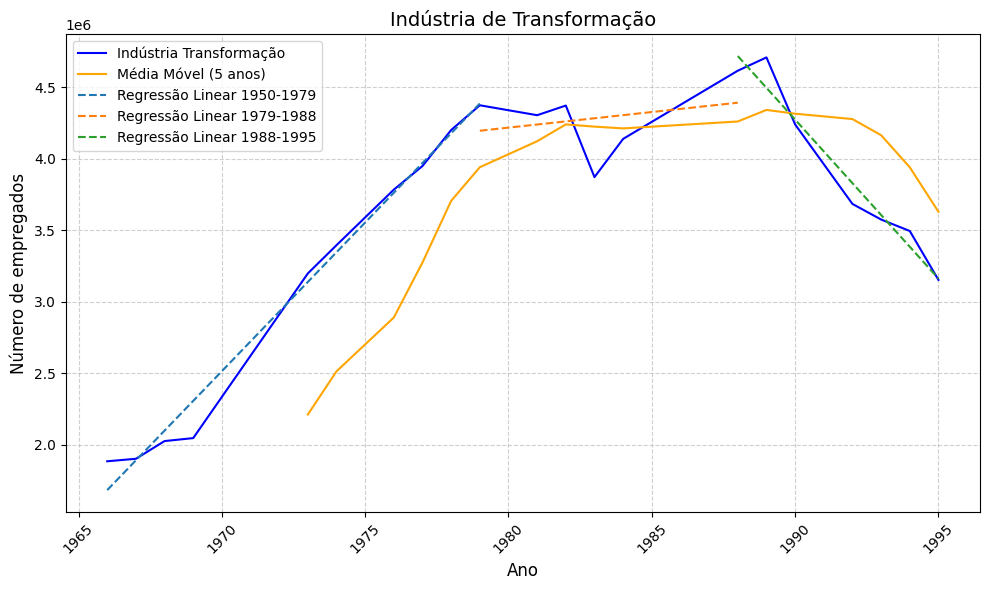

In [72]:
df_emprego = pd.read_csv(r'C:\Users\13073625755\Documents\GitHub\deindustrialization_db\Dados\pesquisa_industrial_anual_1966_1995.csv',index_col=0)
df_emprego = df_emprego[df_emprego['Variavel'] == "Pessoal ocupado em 31/12 - total" ]
df_emprego['Media_movel'] = df_emprego['Indústria de transformação'].rolling(window=5).mean()
df_emprego['Industria_tranf'] = df_emprego['Indústria de transformação']
df_emprego['Ano'] = df_emprego['ano']
df_emprego = df_emprego[['Ano','Industria_tranf','Media_movel']]


fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(df_emprego['Ano'], df_emprego['Industria_tranf'], label='Indústria Transformação', color='blue')
ax.plot(df_emprego['Ano'], df_emprego['Media_movel'], label='Média Móvel (5 anos)', color='orange')

# Add vertical lines for key years
'''key_years = [1975, 1988]
for year in key_years:
    ax.axvline(x=str(year), color='red', linestyle='--', linewidth=1, label=f'Crise do petróleo: {year}' if year == key_years[0] else None)
    ax.axvline(x=str(year), color='red', linestyle='--', linewidth=1, label=f'Abertura Comercial: {year}' if year == key_years[1] else None)'''
# Define the periods
periods = [(1950, 1979), (1979, 1988), (1988,1995)]

# Add linear regression lines for each period
for start, end in periods:
    period_data = df_emprego[(df_emprego['Ano'].astype(int) >= start) & (df_emprego['Ano'].astype(int) <= end)]
    if not period_data.empty:
        slope, intercept, _, _, _ = linregress(period_data['Ano'].astype(int), period_data['Industria_tranf'])
        ax.plot(period_data['Ano'], intercept + slope * period_data['Ano'].astype(int), label=f'Regressão Linear {start}-{end}', linestyle='--')

# Customize the plot
ax.set_title('Indústria de Transformação', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de empregados', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('emprego.svg')

plt.show()


### Participação da Indústria (Contas Nacionais)

In [5]:
df_cn = pd.read_csv(r'C:\Users\13073625755\Documents\GitHub\deindustrialization_db\Dados\contas_nacionais_1947_1995.csv', encoding='iso8859_3')
df = df_cn.loc[df_cn['Setor'] == 'Transformacao_sem_dummy', :].transpose()
df.reset_index(inplace=True)
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df['Transformacao_sem_dummy'] = df['Transformacao_sem_dummy'].fillna(0)
df = df.iloc[:-6]
df.columns = ['Ano','Industria_tranf']
df.tail()

C:\Users\13073625755\AppData\Local\Temp\ipykernel_24200\1154206026.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Transformacao_sem_dummy'] = df['Transformacao_sem_dummy'].fillna(0)


,Ano,Industria_tranf
43,1989,25.60
44,1990,25.52
45,1991,24.36
46,1992,23.17
47,1993,22.60


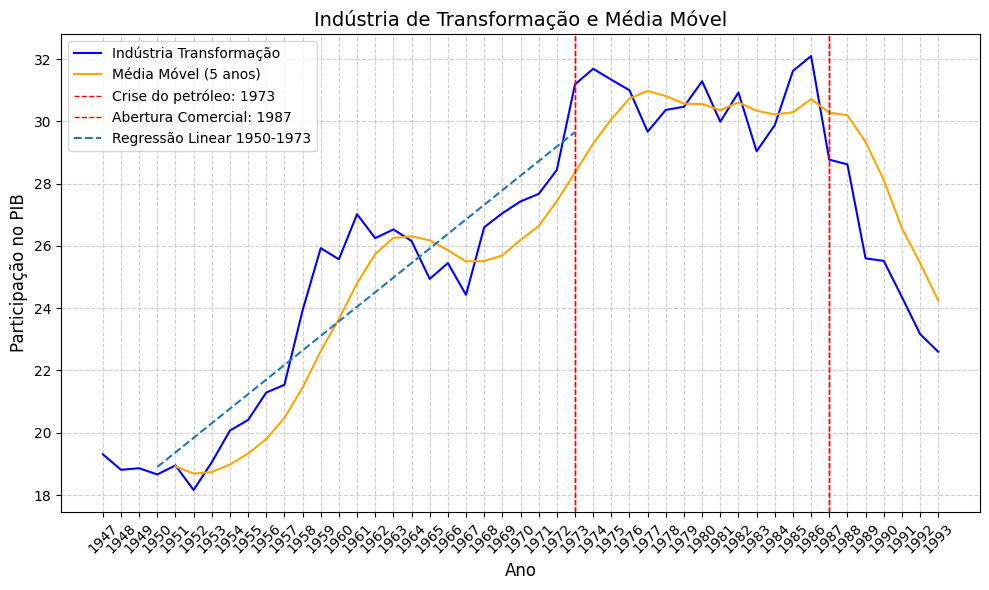

In [73]:


df['Media_movel'] = df['Industria_tranf'].rolling(window=5).mean()
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(df['Ano'], df['Industria_tranf'], label='Indústria Transformação', color='blue')
ax.plot(df['Ano'], df['Media_movel'], label='Média Móvel (5 anos)', color='orange')

# Add vertical lines for key years
key_years = [1973, 1987]
for year in key_years:
    ax.axvline(x=str(year), color='red', linestyle='--', linewidth=1, label=f'Crise do petróleo: {year}' if year == key_years[0] else None)
    ax.axvline(x=str(year), color='red', linestyle='--', linewidth=1, label=f'Abertura Comercial: {year}' if year == key_years[1] else None)
    # Define the periods

periods = [(1950, 1973)]

# Add linear regression lines for each period
for start, end in periods:
    period_data = df[(df['Ano'].astype(int) >= start) & (df['Ano'].astype(int) <= end)]
    if not period_data.empty:
        slope, intercept, _, _, _ = linregress(period_data['Ano'].astype(int), period_data['Industria_tranf'])
        ax.plot(period_data['Ano'], intercept + slope * period_data['Ano'].astype(int), label=f'Regressão Linear {start}-{end}', linestyle='--')

# Customize the plot
ax.set_title('Indústria de Transformação e Média Móvel', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Participação no PIB', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('industria.svg')
plt.show()
